In [2]:
from __future__ import division
%pylab inline
from scipy import stats
from angles import r2d, r2arcs, d2arcs, arcs2r
def arcm2r(theta):
    return arcs2r(theta*60)
import seaborn as sns;sns.set_style('darkgrid')
import lsst.sims.maf.stackers as stackers
import treecorr as tr
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from collections import defaultdict
import treecorr
from itertools import chain
sns.set_context('poster',font_scale=1.4)

Populating the interactive namespace from numpy and matplotlib


In [161]:
runName = '/global/homes/h/husni/lsstpsf/simruns/minion_1016_sqlite'
opsdb = db.OpsimDatabase(runName+'.db')
outDir = 'dither_test'
resultsDb = db.ResultsDb(outDir=outDir)
nside = 128 
myBundles = {}
metric = metrics.Coaddm5Metric()
sqlconstraint = 'filter = "r" and propID = 54'
stackerList = [stackers.SpiralDitherFieldPerVisitStacker(degrees=False,fieldIdCol='fieldID')]
slicer = slicers.HealpixSlicer(nside=64, lonCol='spiralDitherFieldPerVisitRa', latCol='spiralDitherFieldPerVisitDec', latLonDeg=False)
myBundles['field dither'] = metricBundles.MetricBundle(metric, slicer, constraint=sqlconstraint, 
                                                       stackerList=stackerList, runName=runName,
                                                       metadata='field dither')
bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll() 



Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database Summary with constraint filter = "r" and propID = 54 for columns ['fiveSigmaDepth', 'fieldRA', 'fieldID', 'fieldDec']
Found 456557 visits
Running:  ['field dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [3]:
runName = '/global/homes/h/husni/lsstpsf/simruns/feature_baseline_update_10yrsv2'
opsdb = db.Database(runName+'.db', defaultTable='observations')
outDir = 'dither_test'
resultsDb = db.ResultsDb(outDir=outDir)
nside = 128 
myBundles = {}
metric = metrics.Coaddm5Metric(m5Col="fivesigmadepth")
sqlconstraint = 'filter="r"'
stackerList = []
#slicer3 = slicers.BaseSlicer()
slicer3 = slicers.HealpixSlicer(lonCol='RA', latCol='dec', nside=nside)
myBundles['field dither'] = metricBundles.MetricBundle(metric, slicer3, constraint=sqlconstraint, 
                                                       stackerList=stackerList, runName=runName,
                                                       metadata='field dither')
bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll() 

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database observations with constraint filter="r" for columns ['dec', 'RA', 'fivesigmadepth']
Found 486116 visits
Running:  ['field dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [31]:
runName = '/global/homes/h/husni/lsstpsf/simruns/alt_sched'
opsdb = db.OpsimDatabase(runName+'.db')
outDir = 'dither_test'
resultsDb = db.ResultsDb(outDir=outDir)
nside = 128 
myBundles = {}
metric = metrics.Coaddm5Metric()
sqlconstraint = 'filter = "r"'
stackerList = []
slicer3 = slicers.HealpixSlicer(lonCol='fieldRA', latCol='fieldDec', nside=nside)
myBundles['field dither'] = metricBundles.MetricBundle(metric, slicer3, constraint=sqlconstraint, 
                                                       stackerList=stackerList, runName=runName,
                                                       metadata='field dither')
bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter = "r" for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 570519 visits
Running:  ['field dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [32]:
bundle = myBundles['field dither']

In [45]:
cond = np.logical_and(np.logical_and(bundle.metricValues.mask==False, bundle.metricValues.data>26.865), bundle.metricValues.data<28)

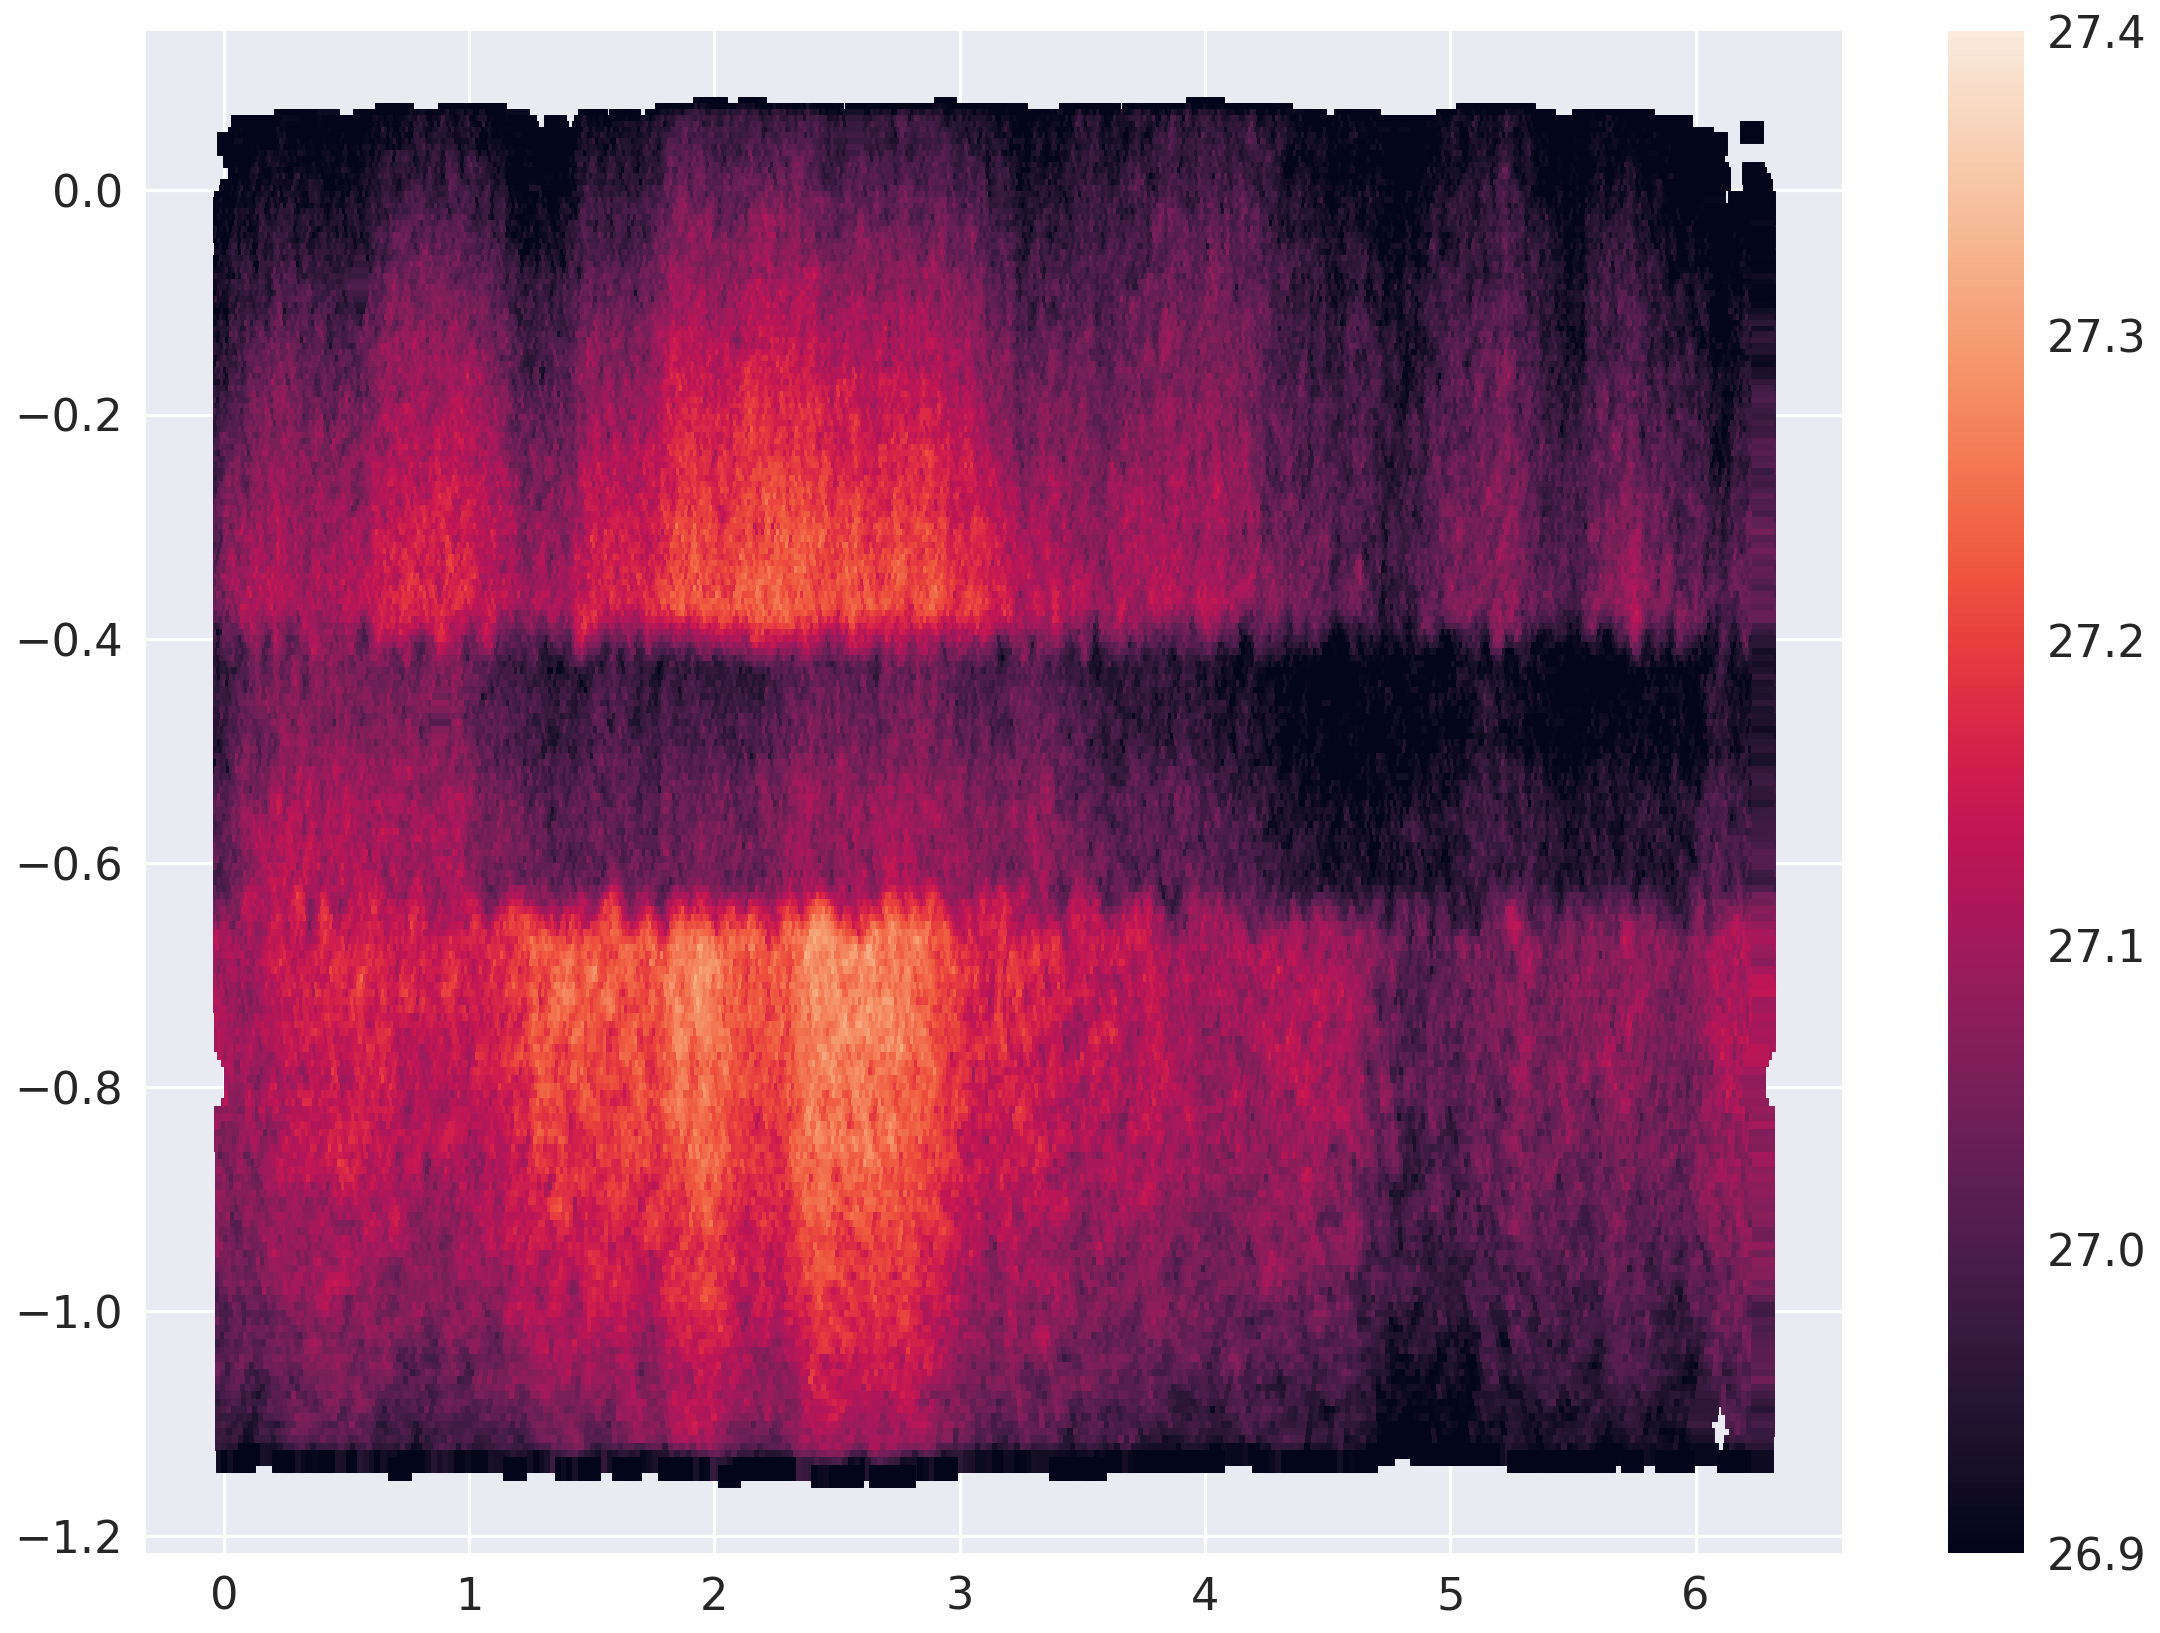

In [46]:
plt.scatter((bundle.slicer.getSlicePoints()['ra'])[cond], (bundle.slicer.getSlicePoints()['dec'])[cond],c=(bundle.metricValues.data)[cond], vmin=26.9,vmax=27.4,marker=',')
plt.colorbar()

In [47]:
condx, condy = (bundle.slicer.getSlicePoints()['ra'])[cond], (bundle.slicer.getSlicePoints()['dec'])[cond]

In [48]:
conds = [np.array([condxi,condyi]) for condxi, condyi in zip(condx,condy)]

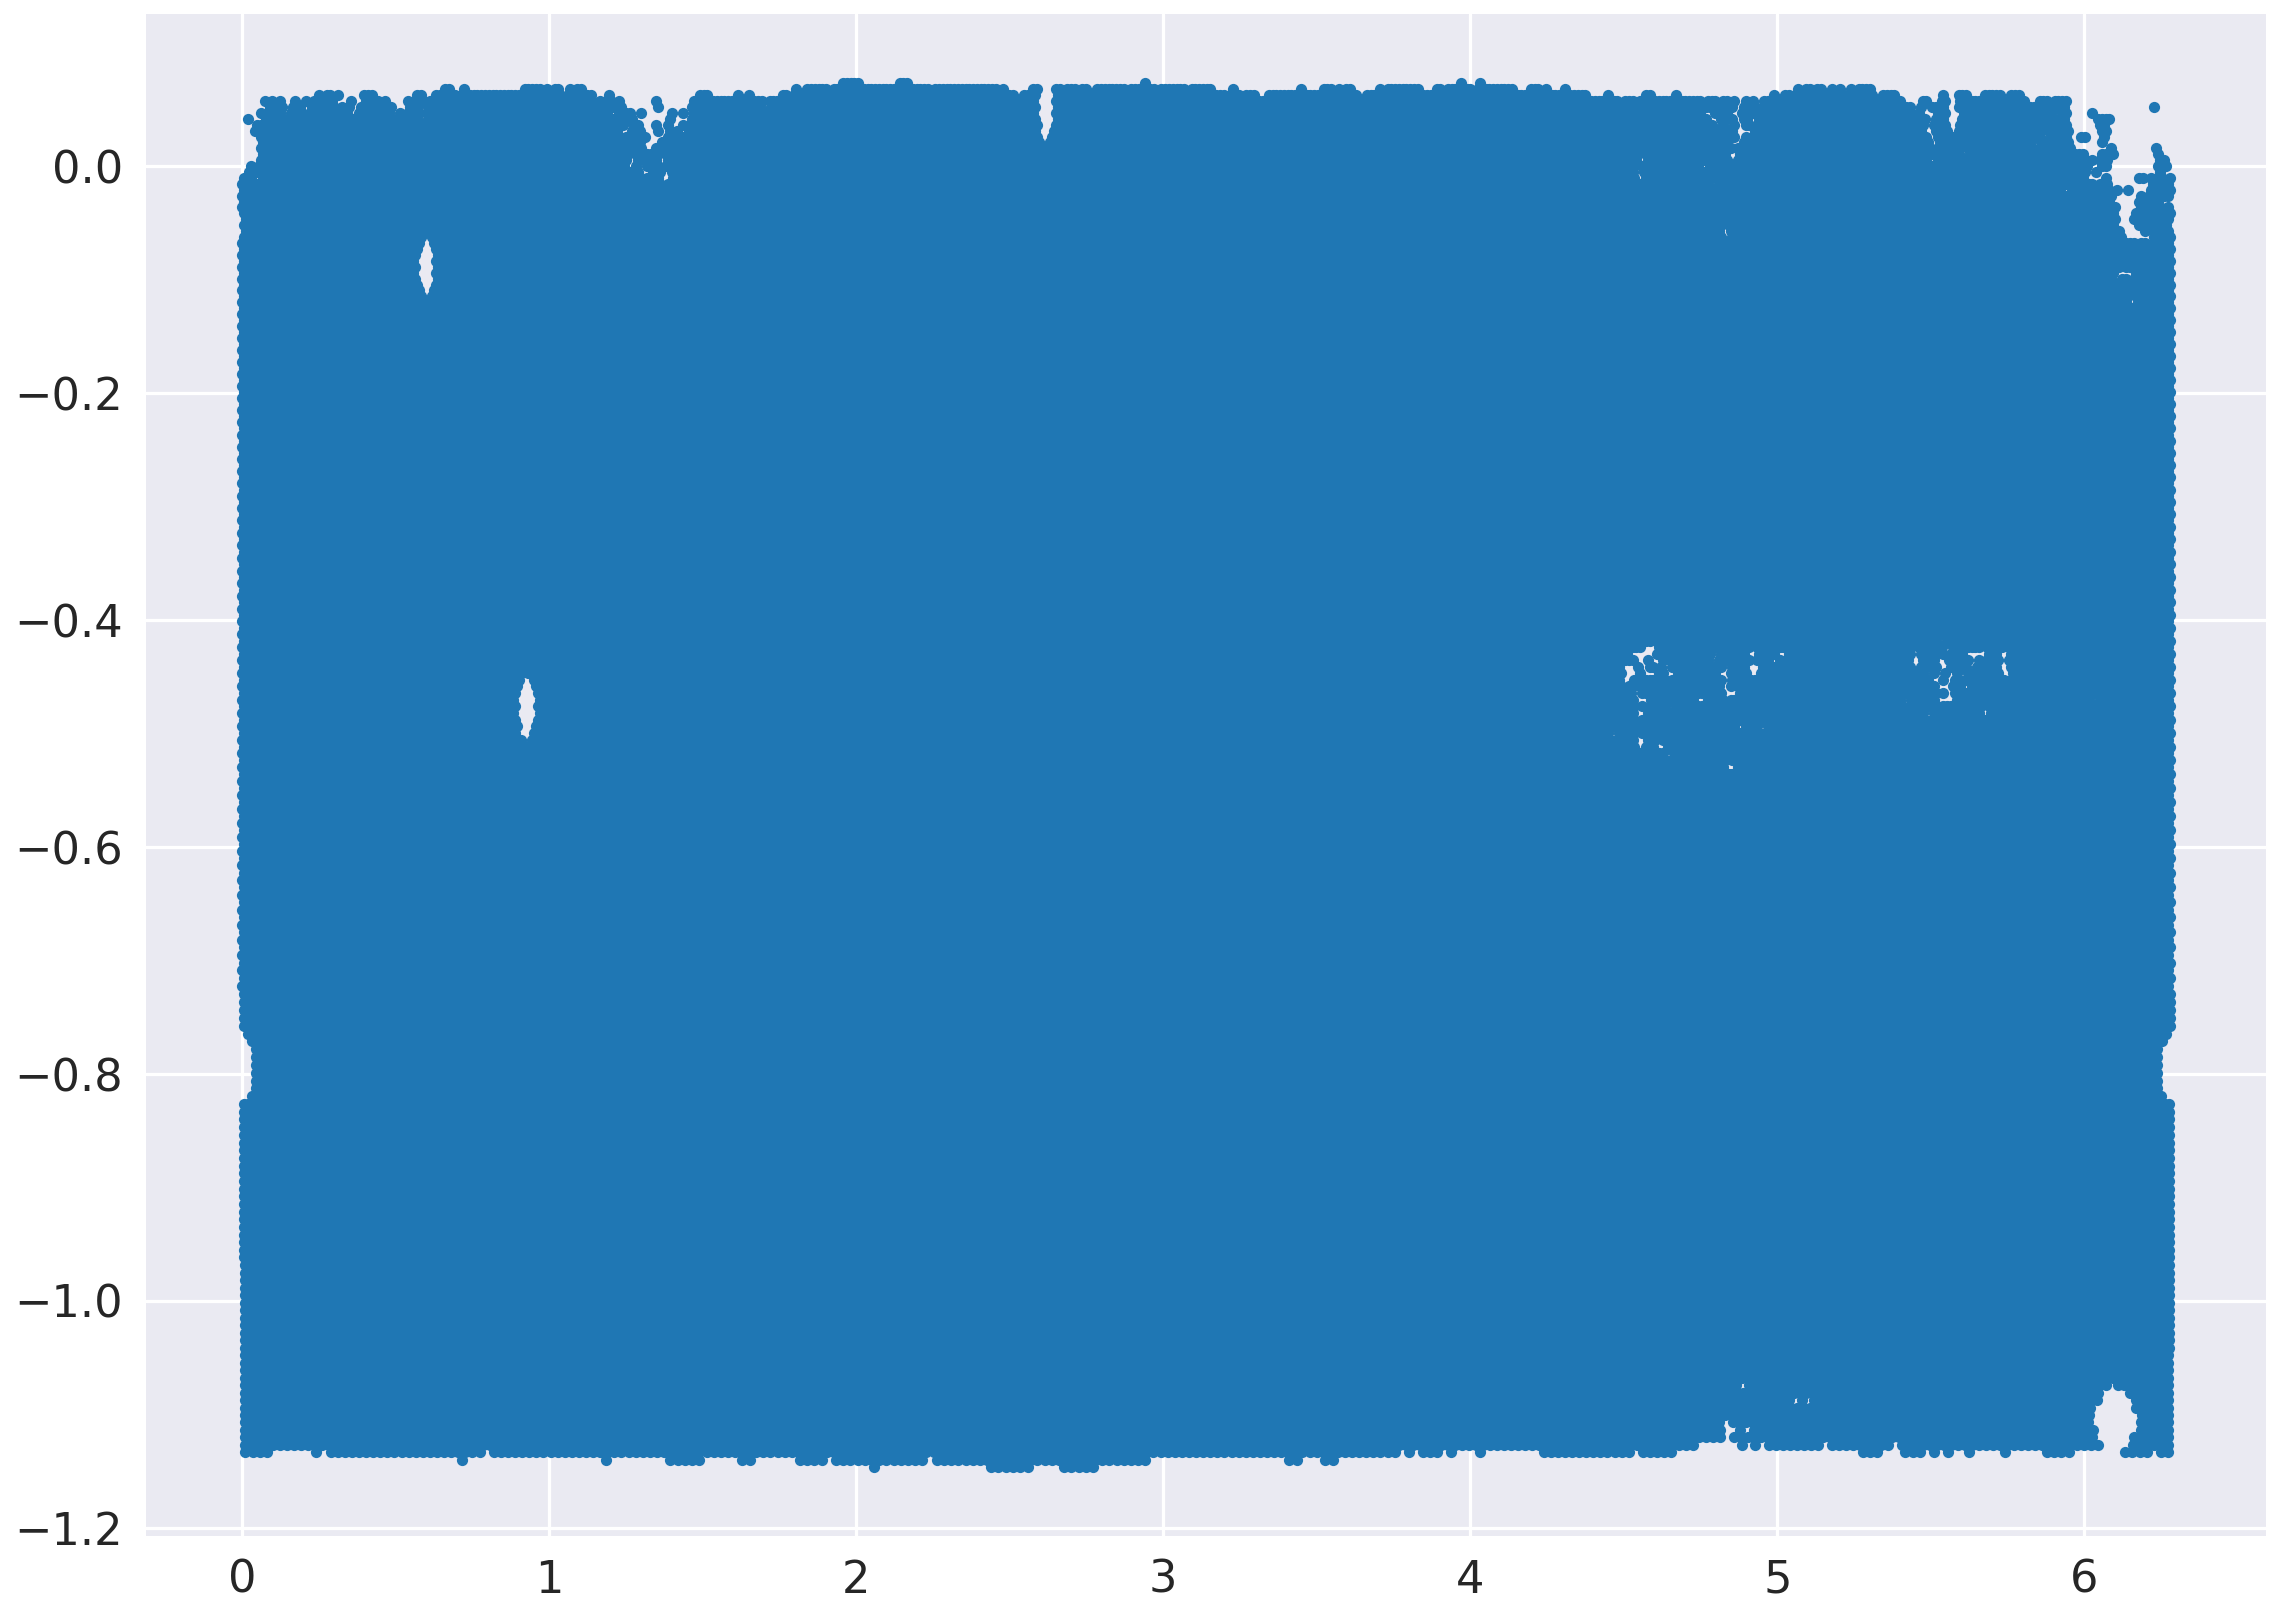

In [49]:
plt.plot(condx,condy,'.')

In [50]:
a = np.array(random.sample(conds*100,500000))+np.random.normal(0,0.009,(500000,2))


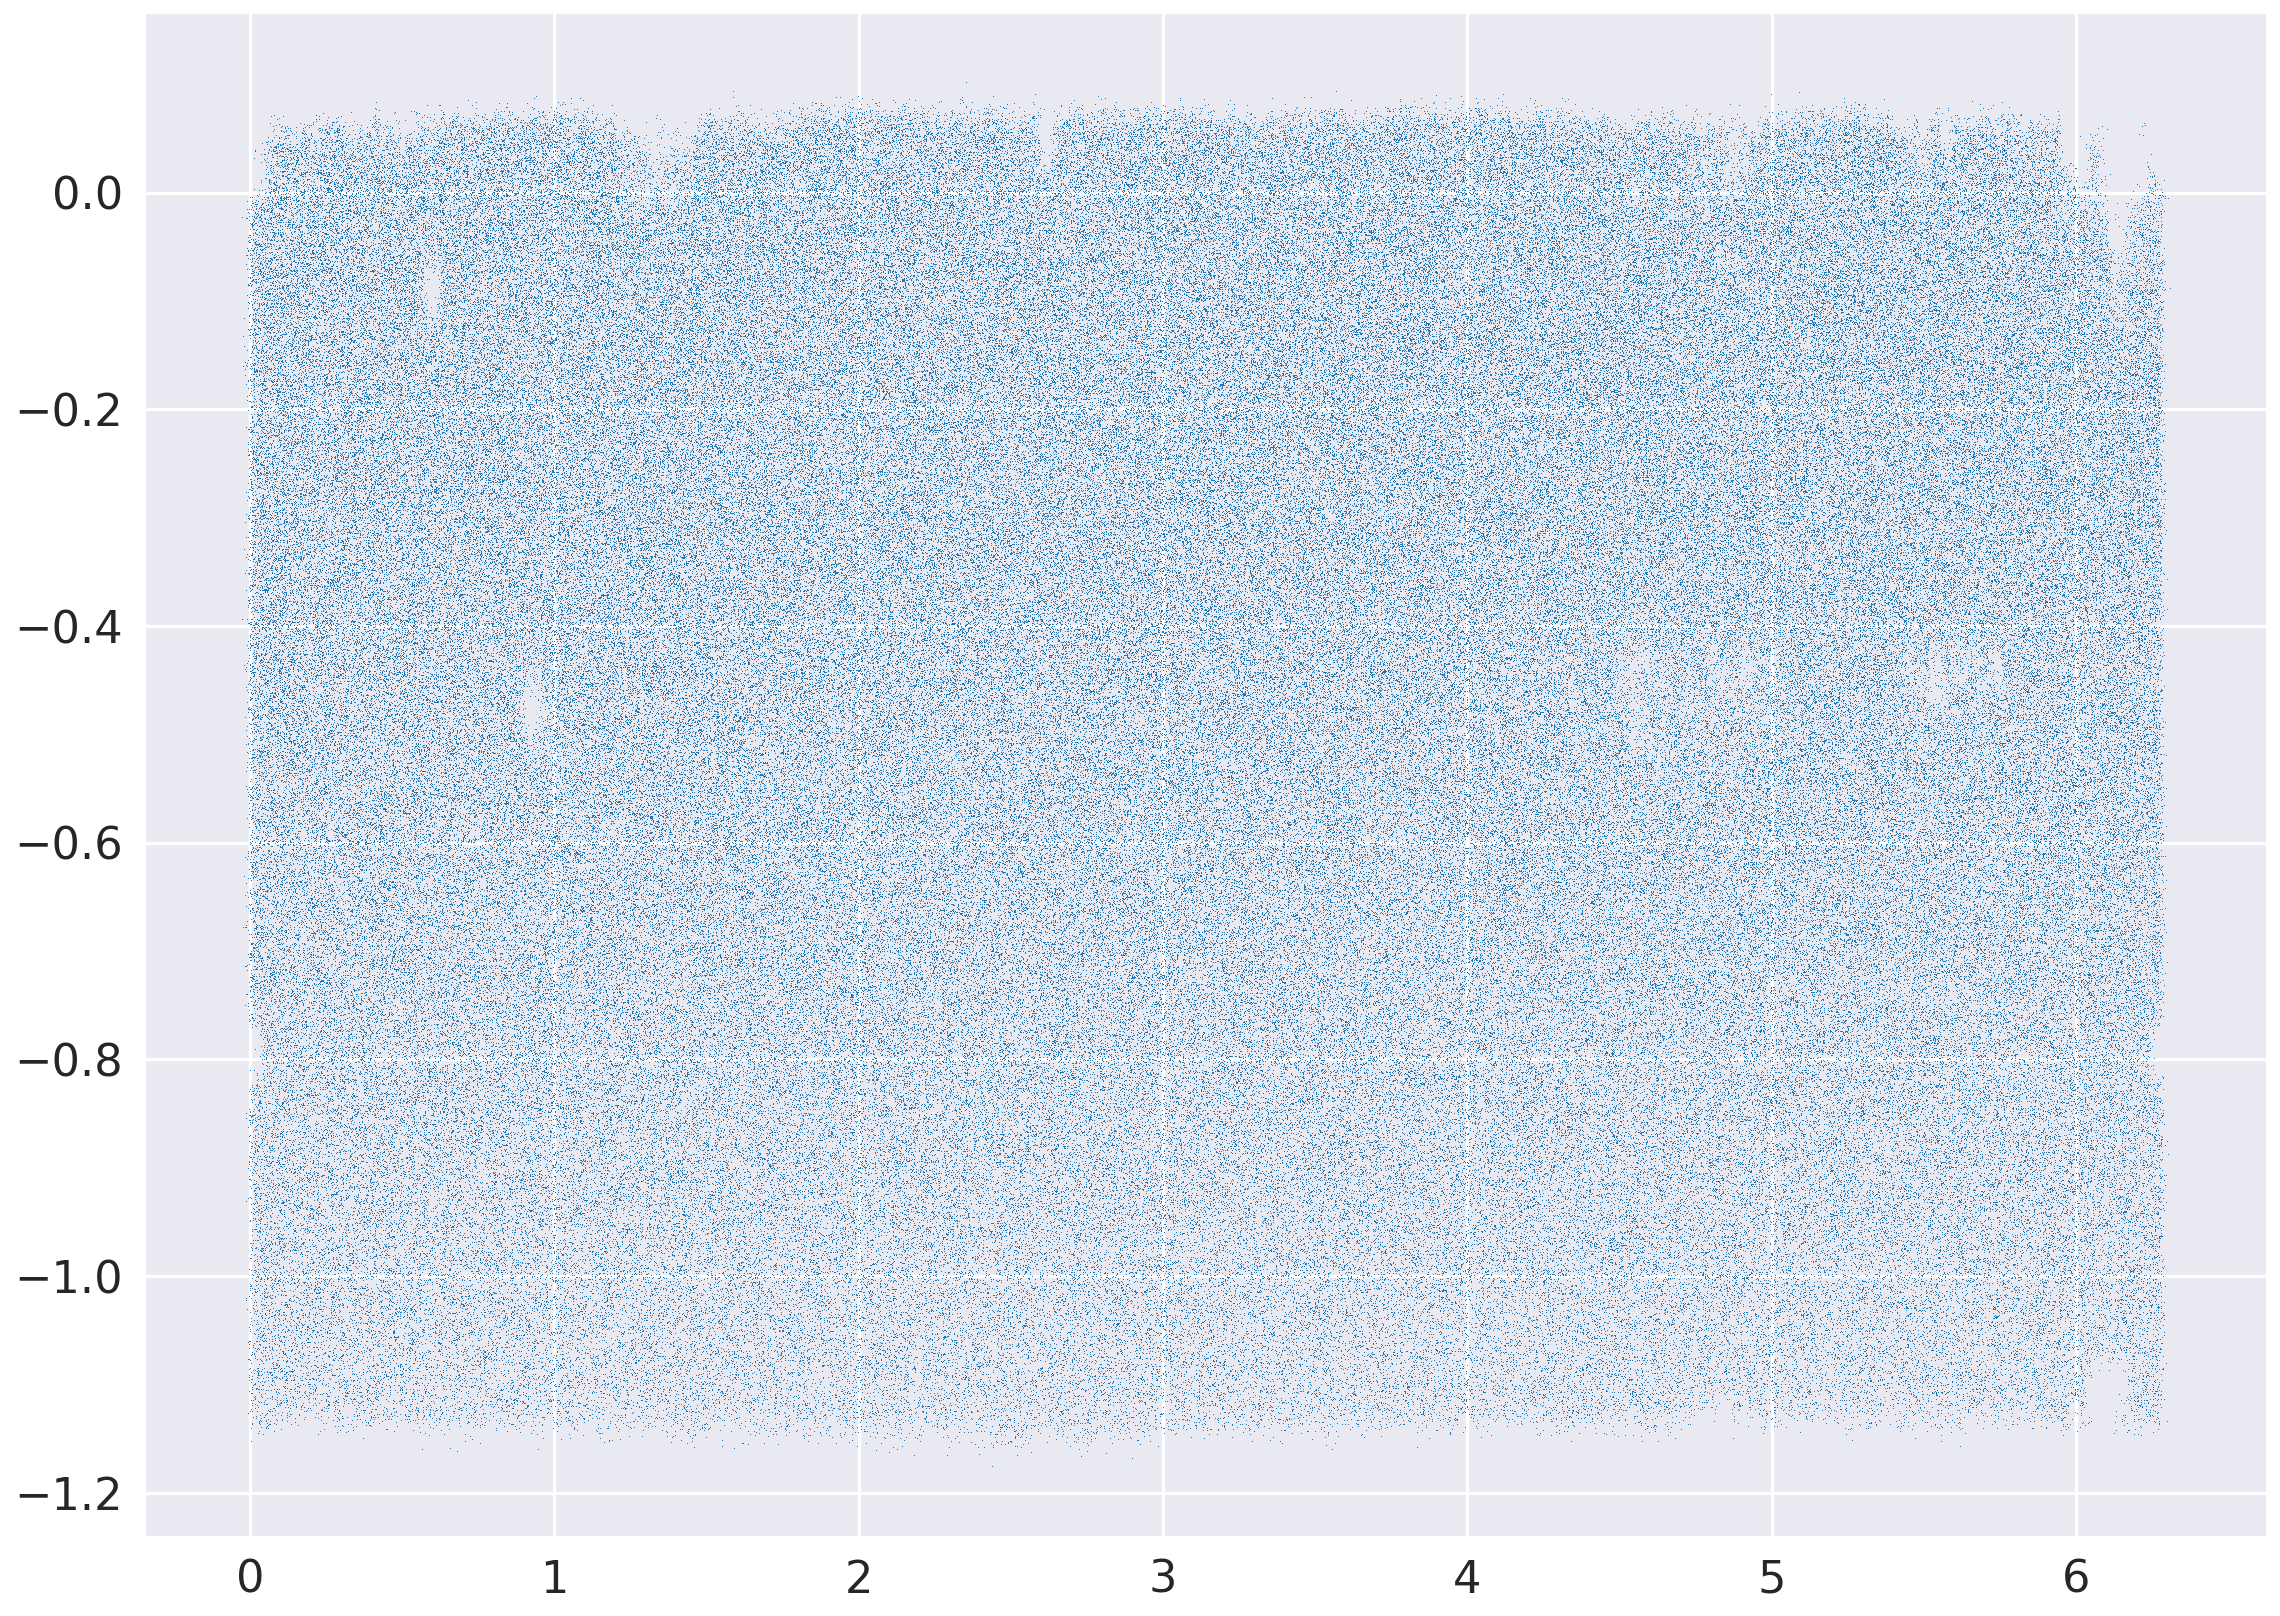

In [51]:
plt.plot(a[:,0],a[:,1],',')

In [52]:
np.save('alt.npy',a)

In [ ]:
bundle = myBundles['field dither']

In [ ]:
cond = np.logical_and(np.logical_and(bundle.metricValues.mask==False, bundle.metricValues.data>27.32), bundle.metricValues.data<28)

In [ ]:
plt.scatter((bundle.slicer.getSlicePoints()['ra'])[cond], (bundle.slicer.getSlicePoints()['dec'])[cond],c=(bundle.metricValues.data)[cond], vmin=27.3,vmax=28,marker=',')
plt.colorbar()

In [ ]:
np.save('/global/homes/h/husni/lsstpsf/simruns/feature_baseline.npy', (bgroup.simData['RA'], bgroup.simData['dec']))

In [ ]:
bundle = myBundles['field dither']

In [ ]:
cond = np.logical_and(np.logical_and(bundle.metricValues.mask==False, bundle.metricValues.data>27), bundle.metricValues.data<28)

In [ ]:
plt.scatter((bundle.slicer.getSlicePoints()['ra'])[cond], (bundle.slicer.getSlicePoints()['dec'])[cond],c=(bundle.metricValues.data)[cond], vmin=27,vmax=28,marker=',')
plt.colorbar()